In [1]:
# Plotting notebook for the project
# Imports
import argparse
import os
import sys
import glob
import re

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from datetime import datetime
import scipy.stats as stats

# Local imports
sys.path.append('/home/users/benhutch/skill-maps')
import dictionaries as dic
import functions as fnc

In [2]:
# for the GIF plots
# !pip install Pillow
# from PIL import Image

In [3]:
# Set up the arguments to be used
# Defined globally in this notebook
variable = "psl"
region = "north-atlantic"
season = "DJFM"
forecast_range = "2-9"

In [4]:
# Load the model data
datasets = fnc.load_data(dic.base_dir, dic.models, variable, region, forecast_range, season)

Searching for files in  /home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/north-atlantic/years_2-9/DJFM/outputs/mergetime/*.nc
Files for BCC-CSM2-MR: ['/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_north-atlantic_2-9_DJFM-r6i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_north-atlantic_2-9_DJFM-r5i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_north-atlantic_2-9_DJFM-r7i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_north-atlantic_2-9_DJFM-r2i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_north-atla

In [5]:
# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

Dataset type: <class 'dict'>


In [6]:
# Choose the obs path based on the variable
if variable == "psl":
    obs_path = dic.obs_psl_na
elif variable == "tas":
    obs_path = dic.obs_tas
elif variable == "sfcWind":
    obs_path = dic.obs_sfcWind
elif variable == "rsds":
    obs_path = dic.obs_rsds
else:
    print("Error: variable not found")
    sys.exit()

# choose the obs var name based on the variable
if variable == "psl":
    obs_var_name = dic.psl_label
elif variable == "tas":
    obs_var_name = dic.tas_label
elif variable == "sfcWind":
    obs_var_name = dic.sfc_wind_label
elif variable == "rsds":
    obs_var_name = dic.rsds_label
else:
    print("Error: variable not found")
    sys.exit()

In [7]:
# # Process the observations
obs = fnc.process_observations(variable, region, dic.north_atlantic_grid_obs, 
                               forecast_range, season, obs_path, obs_var_name)

Forecast range: 2 - 9
Rolling mean range: 8


In [8]:
obs

<xarray.Dataset>
Dimensions:  (time: 63, lon: 48, lat: 24)
Coordinates:
  * time     (time) datetime64[ns] 1960-12-31 1961-12-31 ... 2022-12-31
  * lon      (lon) float64 -80.0 -77.5 -75.0 -72.5 -70.0 ... 30.0 32.5 35.0 37.5
  * lat      (lat) float64 20.0 22.5 25.0 27.5 30.0 ... 67.5 70.0 72.5 75.0 77.5
Data variables:
    var151   (time, lat, lon) float64 dask.array<chunksize=(8, 24, 48), meta=np.ndarray>

In [9]:
# # check the values of obs
obs["var151"]

# count how many value are NaN
nan_count = np.isnan(obs["var151"]).sum()

print(nan_count.values)

# count how many values are not NaN
not_nan_count = np.count_nonzero(obs["var151"])

print(not_nan_count)

# calculate the percentage of NaN values
nan_percentage = nan_count / (nan_count + not_nan_count) * 100

# # print the percentage of NaN values
# print("Percentage of NaN values in obs: ", nan_percentage)

8064
72576


In [10]:
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(obs, variable_data, dic.models)

extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: CMCC-CM2-SR5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: EC-Earth3
extracting data for model: MPI-ESM1-2-LR
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: CESM1-1-CAM5-CMIP5
extracting data for model: NorCPM1
Correlation coefficients range from -0.482 to 0.629
P-values range from 0.000 to 0.997


(array([[3., 0., 1., 1., 0., 0., 2., 0., 1., 5., 0., 0., 0., 2., 6., 3.,
         0., 0., 0., 0.],
        [1., 1., 2., 0., 2., 0., 0., 1., 0., 4., 2., 1., 0., 1., 8., 1.,
         0., 0., 0., 0.],
        [0., 2., 1., 1., 1., 1., 0., 0., 2., 2., 1., 2., 2., 2., 5., 2.,
         0., 0., 0., 0.],
        [0., 0., 4., 1., 0., 1., 0., 1., 1., 1., 2., 1., 1., 2., 5., 4.,
         0., 0., 0., 0.],
        [0., 2., 2., 0., 1., 0., 0., 1., 1., 2., 2., 0., 2., 0., 7., 3.,
         1., 0., 0., 0.],
        [1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 2., 2., 1., 5., 2., 3.,
         1., 1., 0., 0.],
        [0., 2., 0., 0., 1., 1., 1., 0., 1., 0., 0., 3., 4., 2., 4., 2.,
         1., 2., 0., 0.],
        [0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 5., 2., 4., 3.,
         0., 2., 1., 0.],
        [0., 0., 0., 0., 2., 0., 0., 2., 1., 0., 1., 0., 4., 4., 5., 1.,
         1., 2., 1., 0.],
        [0., 0., 0., 0., 0., 1., 1., 0., 2., 1., 1., 2., 2., 3., 5., 1.,
         1., 2., 2., 0.],
        [0

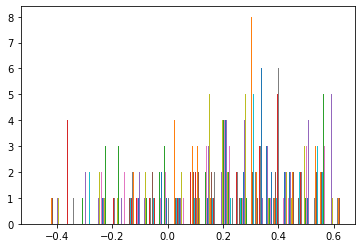

In [11]:
# print the rfield
# print(rfield)
# visualise the distribution of r values
# as a histogram
plt.hist(rfield, bins=20)

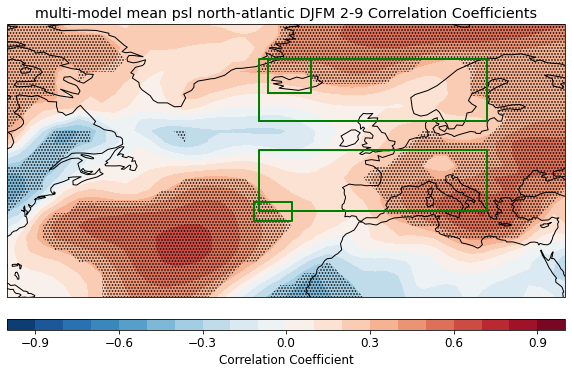

In [12]:
# # Call the function to plot the spatial correlations of these
fnc.plot_correlations(dic.models, rfield, pfield, obs, variable, region, season, forecast_range, dic.plots_dir, obs_lons_converted, lons_converted, dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

Processing model: BCC-CSM2-MR
extracting data for model: BCC-CSM2-MR
Correlation coefficients range from -0.189 to 0.610
P-values range from 0.000 to 1.000
Processing model: MPI-ESM1-2-HR
extracting data for model: MPI-ESM1-2-HR
Correlation coefficients range from -0.405 to 0.588
P-values range from 0.000 to 0.998
Processing model: CanESM5
extracting data for model: CanESM5
Correlation coefficients range from -0.562 to 0.583
P-values range from 0.000 to 0.982
Processing model: CMCC-CM2-SR5
extracting data for model: CMCC-CM2-SR5
Correlation coefficients range from -0.367 to 0.514
P-values range from 0.000 to 0.997
Processing model: HadGEM3-GC31-MM
extracting data for model: HadGEM3-GC31-MM
Correlation coefficients range from -0.543 to 0.464
P-values range from 0.000 to 0.995
Processing model: EC-Earth3
extracting data for model: EC-Earth3
Correlation coefficients range from -0.563 to 0.372
P-values range from 0.000 to 0.998
Processing model: MPI-ESM1-2-LR
extracting data for model: MPI

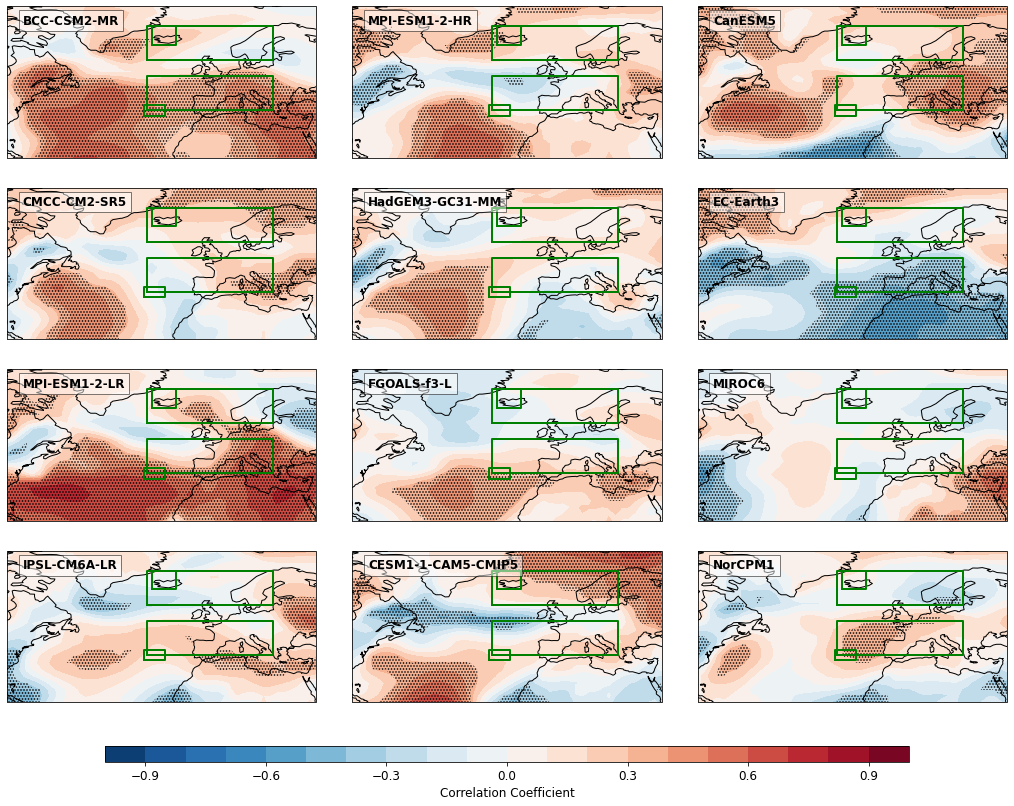

In [13]:
# Test the new function which plots the spatial correlations as subplots
# For all of the models
fnc.plot_correlations_subplots(dic.models, obs, variable_data, variable, region, season, forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

In [14]:
# Now globally
# Need to process the model data first
region = "global"

In [ ]:
# Load the model data
# Now for the global region
datasets = fnc.load_data(dic.base_dir, dic.models, variable, region, forecast_range, season)

In [ ]:
# Process the model data
# Again, this is for the global region
variable_data, model_time = fnc.process_data(datasets, variable)

In [ ]:
# Choose the obs path based on the variable
if variable == "psl":
    obs_path = dic.obs_psl
elif variable == "tas":
    obs_path = dic.obs_tas
elif variable == "sfcWind":
    obs_path = dic.obs_sfcWind
elif variable == "rsds":
    obs_path = dic.obs_rsds
else:
    print("Error: variable not found")
    sys.exit()

# choose the obs var name based on the variable
if variable == "psl":
    obs_var_name = dic.psl_label
elif variable == "tas":
    obs_var_name = dic.tas_label
elif variable == "sfcWind":
    obs_var_name = dic.sfc_wind_label
elif variable == "rsds":
    obs_var_name = dic.rsds_label
else:
    print("Error: variable not found")
    sys.exit()

In [ ]:
# Process the observations
# For the global region
# # Process the observations
# This function doesn't select the region, so no need to worry about the dic. variable
obs = fnc.process_observations(variable, region, dic.north_atlantic_grid_obs, 
                               forecast_range, season, obs_path, obs_var_name)

In [ ]:
# Calculate the r and p fields for the global region
rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(obs, variable_data, dic.models)

In [ ]:
# Plot the global multi-model spatial correlations
# # Call the function to plot the spatial correlations of these
fnc.plot_correlations(dic.models, rfield, pfield, obs, variable, region, season, forecast_range, dic.plots_dir, obs_lons_converted, lons_converted, dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)

In [ ]:
# Now for the global individual model subplots
# Test the new function which plots the spatial correlations as subplots
# For all of the models
fnc.plot_correlations_subplots(dic.models, obs, variable_data, variable, region, season, forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid, dic.uk_n_box, dic.uk_s_box)